In [1]:
# import packages
import h5py # read h5

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib import rc
from cycler import cycler

import numpy as np
import pandas as pd

from merge_h5_files import merge_preserve_time
import os
import glob

# download and install Dr. Jin's python package, click the url below for more details
# !git clone https://github.com/jinwar/jin_pylib

from jin_pylib import gjsignal
from jin_pylib import Data2D_XT

In [2]:
# Figure format
rc = {'axes.facecolor':'white',
      'figure.figsize': (12, 6),
      'savefig.dpi': 600,
#       'axes.grid' : False,
      'axes.edgecolor' : '0.15',
      'font.family':'Times New Roman',
      'font.serif': ['Times New Roman', 'Times', 'STIXGeneral'],  # 备选

      # —— 数学字体（$...$ 内）——
      'mathtext.fontset': 'stix',     # 关键：让 μ、ε 等用 STIX（Times 风格）
      'axes.unicode_minus': False,    # 让负号显示为正常的连字符
      
      'axes.labelsize': 44,         # X、Y 轴标题字体
      'axes.labelweight': 'bold',   # X、Y 轴标题加粗
      'xtick.labelsize': 44,        # X轴刻度文字
      'ytick.labelsize': 44,        # Y轴刻度文字
      'legend.fontsize': 44,       # 图例字体

      # 线宽与颜色顺序
      'lines.linewidth': 2.25,      # 所有线条默认 2.25 pt
      'axes.prop_cycle': cycler('color', list(('k', 'r', 'b', 'g', 'm', 'c', 'y'))),

      # 刻度朝外 & 粗细
      'xtick.direction': 'out',
      'ytick.direction': 'out',
      'xtick.major.size': 6,
      'ytick.major.size': 6,
      'xtick.major.width': 2.0,
      'ytick.major.width': 2.0,

      # 坐标轴（内框）线宽
      'axes.linewidth': 4.0,
      } 
# lack of font size
plt.rcParams.update(rc)

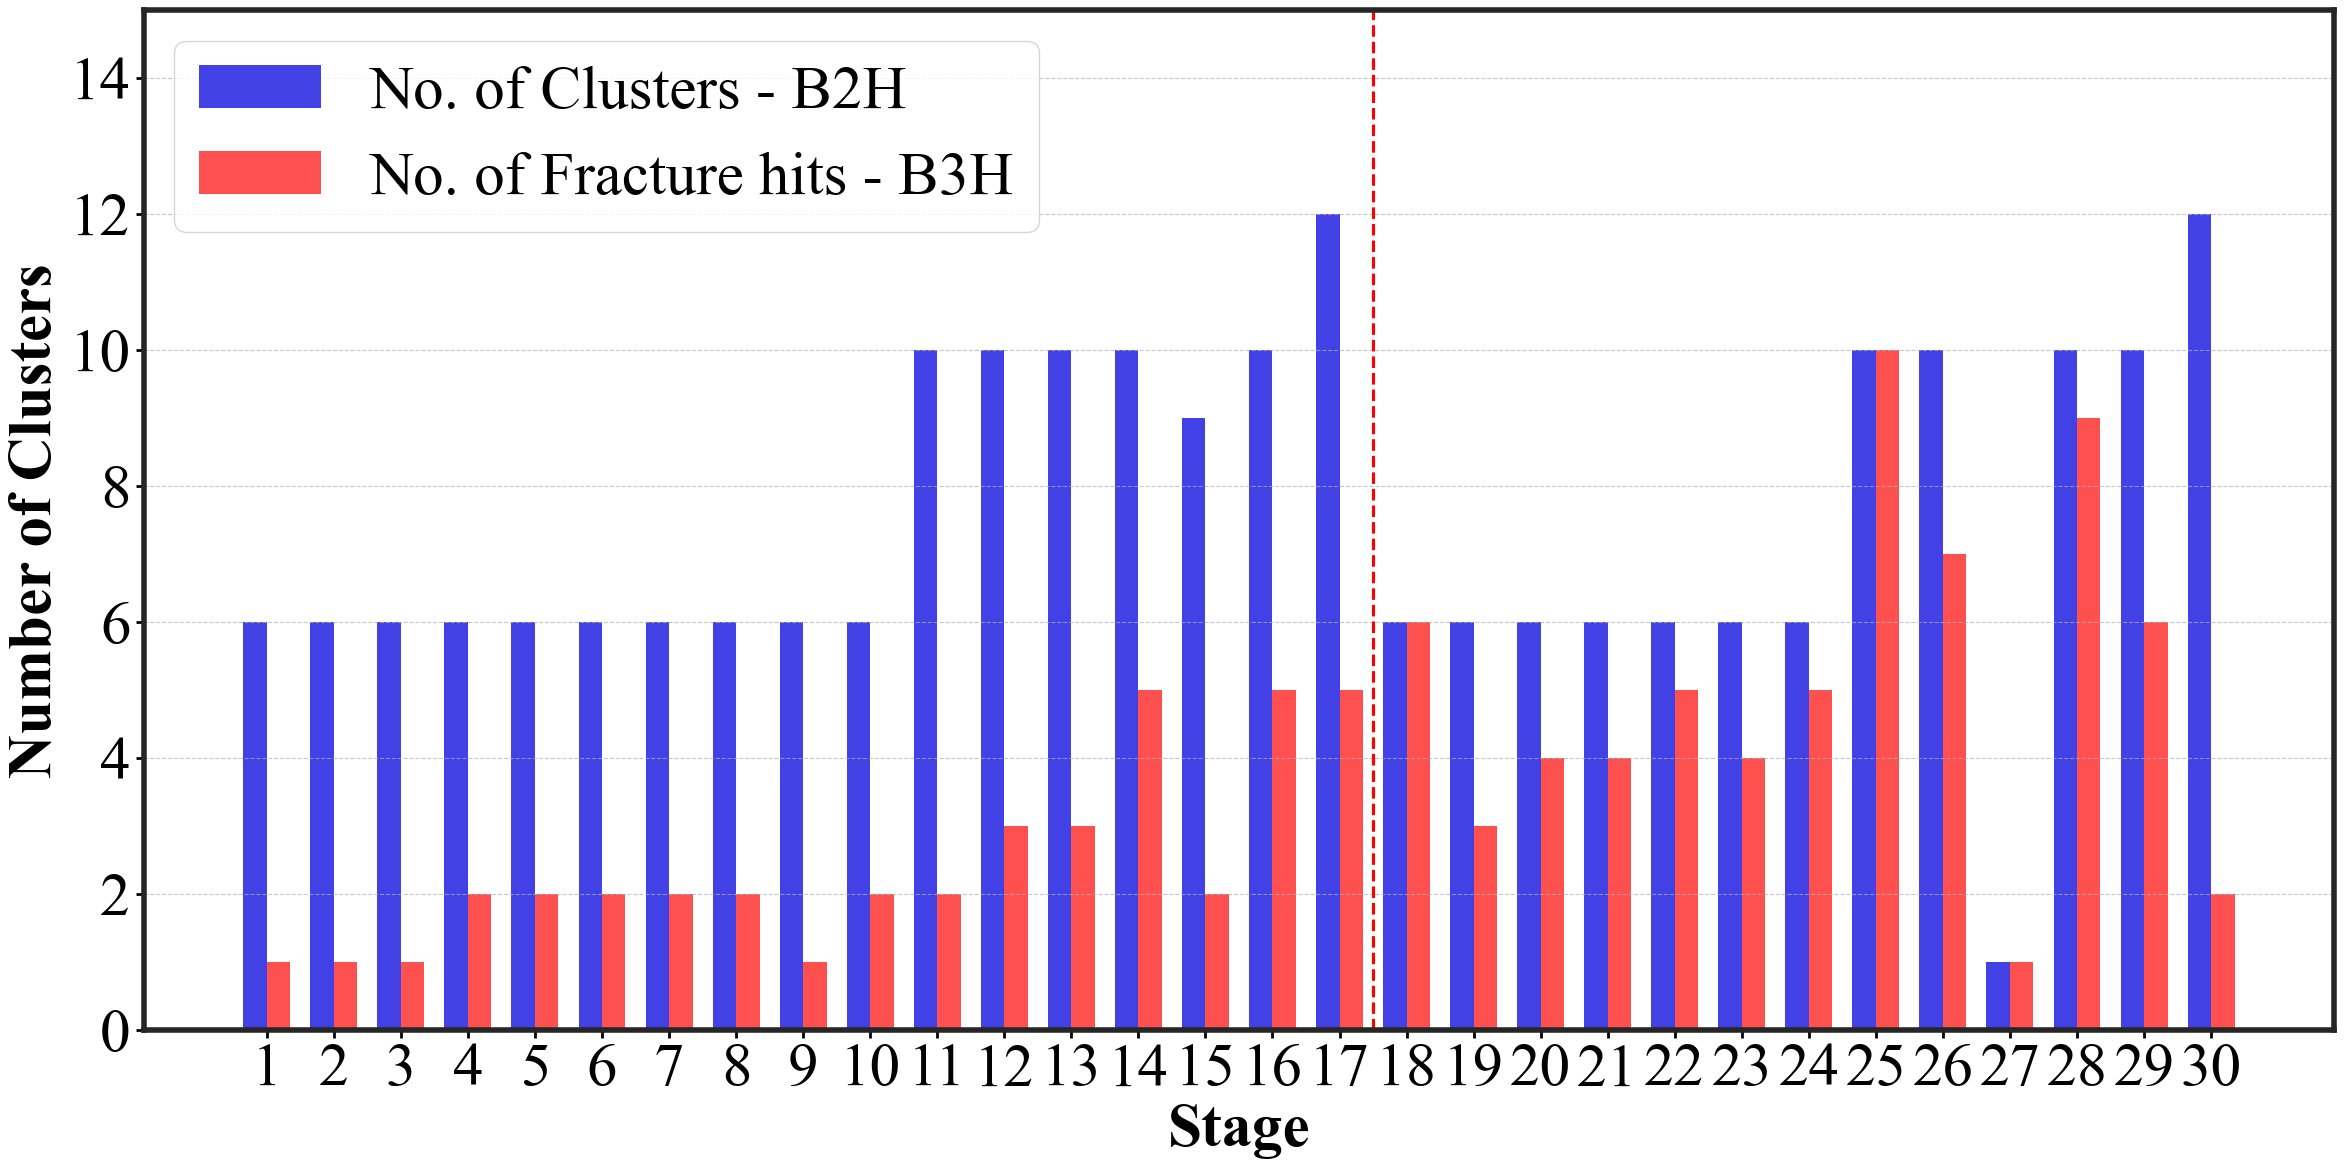

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
stages = np.arange(1, 31)
# 蓝色柱子：No. of Clusters - B2H
num_clusters = [
    6, 6, 6, 6, 6, 6, 6, 6, 6, 6,  # Stages 1-10
    10, 10, 10, 10, 9, 10, 12,     # Stages 11-17
    6, 6, 6, 6, 6, 6, 6,           # Stages 18-24
    10, 10, 1, 10, 10, 12          # Stages 25-30
]

# 橙色柱子：No. of Fracture hits - B3H
num_fracture_hits = [
    1, 1, 1, 2, 2, 2, 2, 2, 1, 2,  # Stages 1-10
    2, 3, 3, 5, 2, 5, 5, 6,        # Stages 11-18
    3, 4, 4, 5, 4, 5,              # Stages 19-24
    10, 7, 1, 9, 6, 2              # Stages 25-30
]

# 设置图形大小
plt.figure(figsize=(24,12))

# 设置柱宽和位置
bar_width = 0.35
x = np.arange(len(stages))

# 绘制柱状图
plt.bar(x - bar_width/2, num_clusters, width=bar_width, label='No. of Clusters - B2H', color="#4141E5")
plt.bar(x + bar_width/2, num_fracture_hits, width=bar_width, label='No. of Fracture hits - B3H', color='#FF5050')

# 添加分区线
plt.axvline(x=16.5, color='red', linestyle='--')  # Parent well impacted / not impacted

# 添加文本标签
# plt.text(7, 15, 'Parent well impacted', ha='center', va='center', fontsize=12)
# plt.text(23, 15, 'Parent well not impacted', ha='center', va='center', fontsize=12)

# 设置刻度和标签
plt.xticks(x, stages)
plt.xlabel('Stage')
plt.ylabel('Number of Clusters')
# plt.title('Frac hits at B3H during B2H treatment')
plt.legend()
plt.ylim(0,15)

# 显示网格线
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


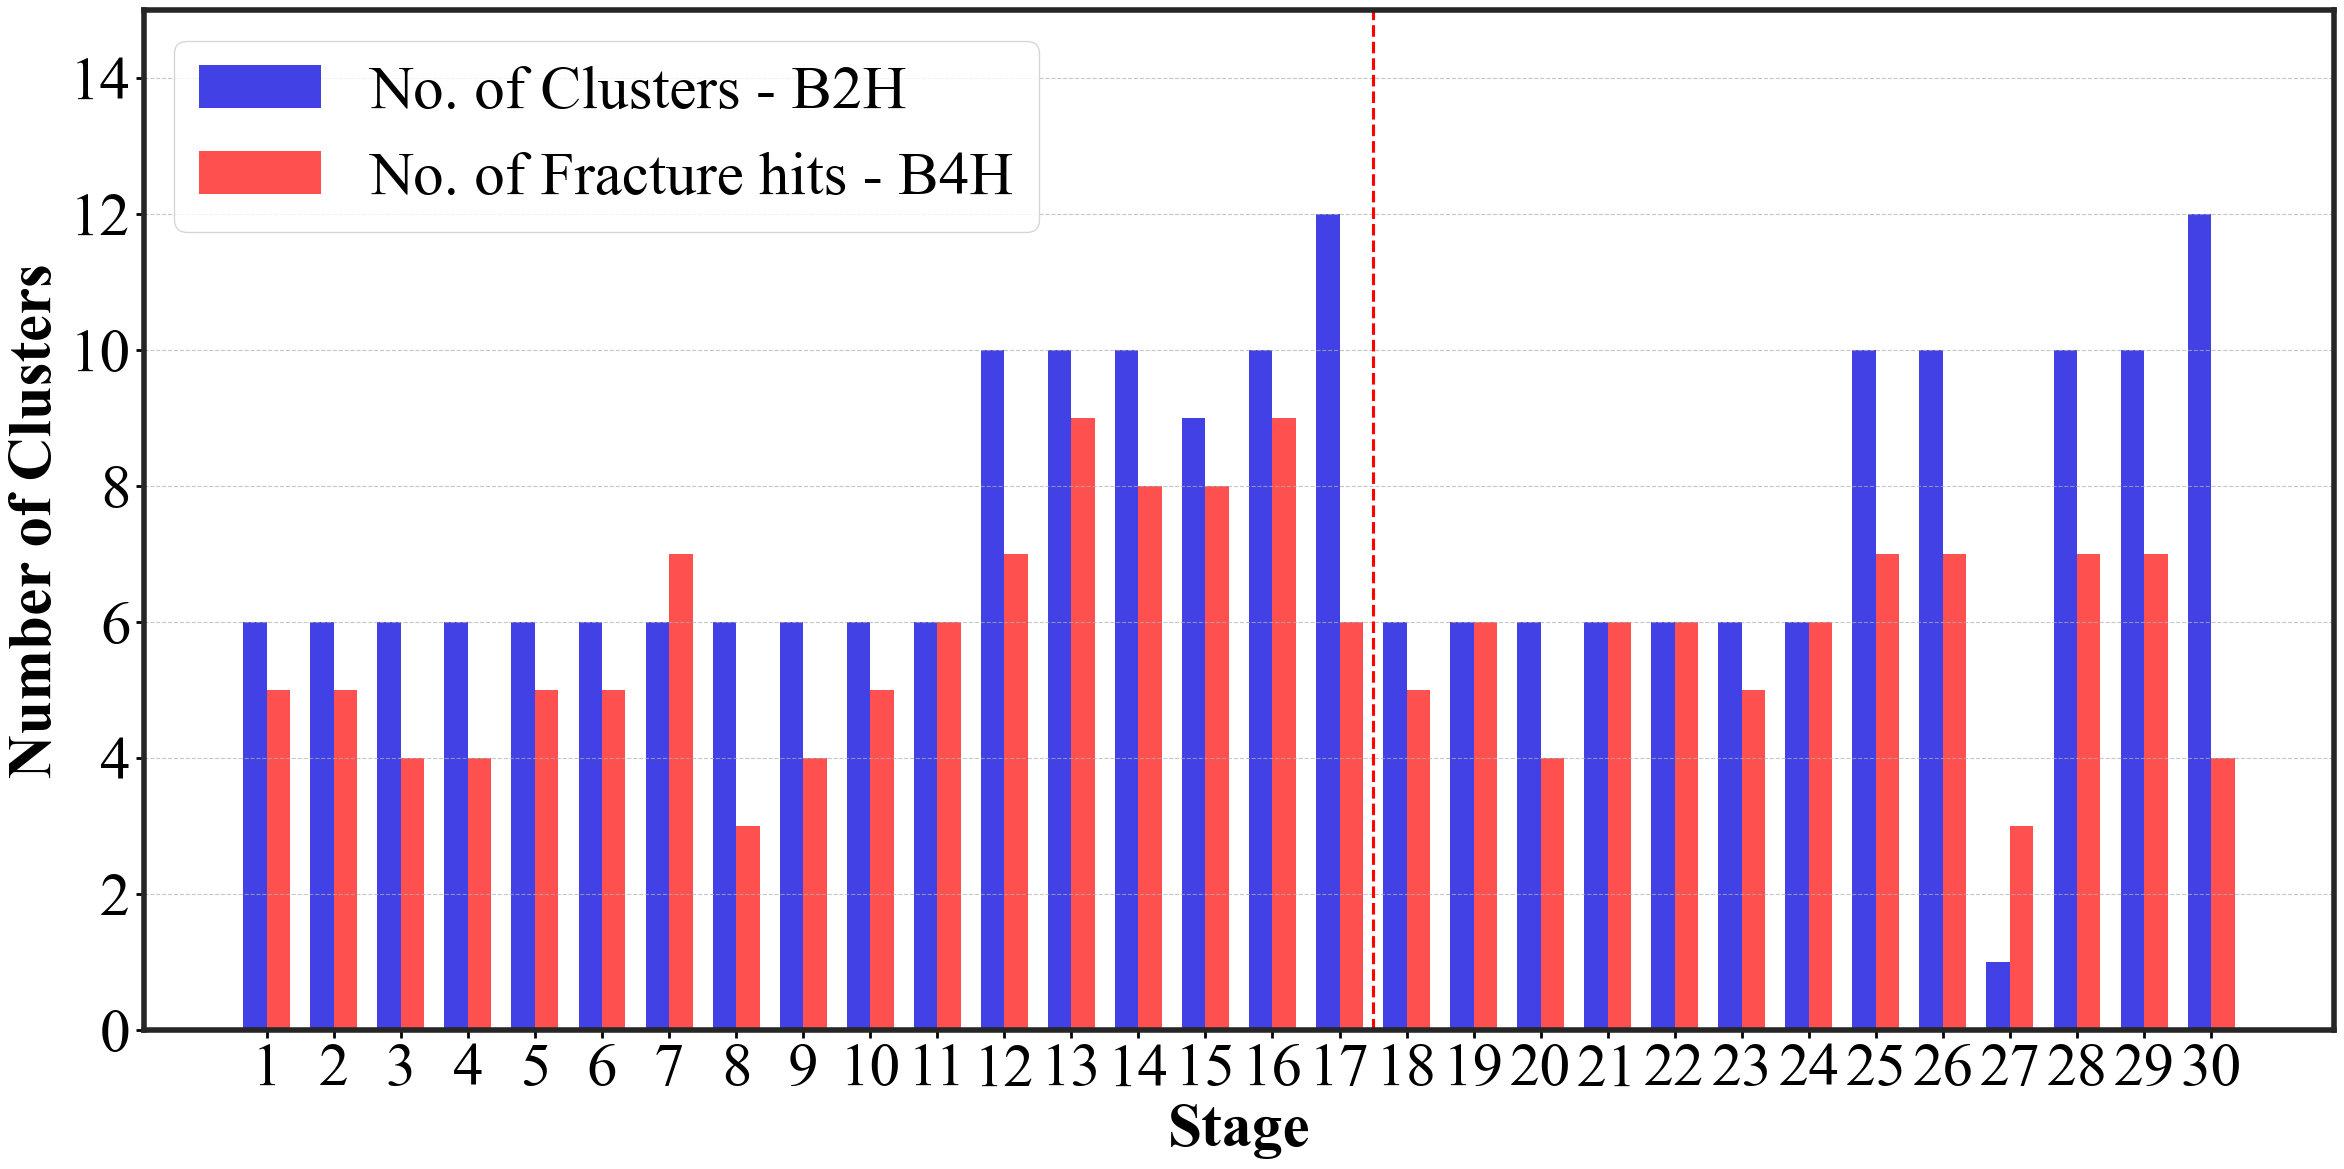

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
stages = np.arange(1, 31)
# Blue bars: No. of Clusters - B2H (Stage 1-30)
num_clusters = [
    6, 6, 6, 6, 6, 6, 6, 6, 6, 6,   # Stages 1-10
    6, 10, 10, 10, 9, 10, 12, 6, 6, 6, # Stages 11-20
    6, 6, 6, 6, 10, 10, 1, 10, 10, 12  # Stages 21-30
]

# Orange bars: No. of Fracture hits - B4H (Stage 1-30)
num_fracture_hits = [
    5, 5, 4, 4, 5, 5, 7, 3, 4, 5,   # Stages 1-10 (Stage 10 appears to be 0)
    6, 7, 9, 8, 8, 9, 6, 5, 6, 4,   # Stages 11-20 (Stage 19 appears to be 0)
    6, 6, 5, 6, 7, 7, 3, 7, 7, 4    # Stages 21-30 (Stage 21 appears to be 0)
]

# 设置图形大小
plt.figure(figsize=(24,12))

# 设置柱宽和位置
bar_width = 0.35
x = np.arange(len(stages))

# 绘制柱状图
plt.bar(x - bar_width/2, num_clusters, width=bar_width, label='No. of Clusters - B2H', color="#4141E5")
plt.bar(x + bar_width/2, num_fracture_hits, width=bar_width, label='No. of Fracture hits - B4H', color='#FF5050')

# 添加分区线
plt.axvline(x=16.5, color='red', linestyle='--')  # Parent well impacted / not impacted

# 添加文本标签
# plt.text(7, 15, 'Parent well impacted', ha='center', va='center', fontsize=12)
# plt.text(23, 15, 'Parent well not impacted', ha='center', va='center', fontsize=12)

# 设置刻度和标签
plt.xticks(x, stages)
plt.xlabel('Stage')
plt.ylabel('Number of Clusters')
# plt.title('Frac hits at B3H during B2H treatment')
plt.legend()
plt.ylim(0,15)

# 显示网格线
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


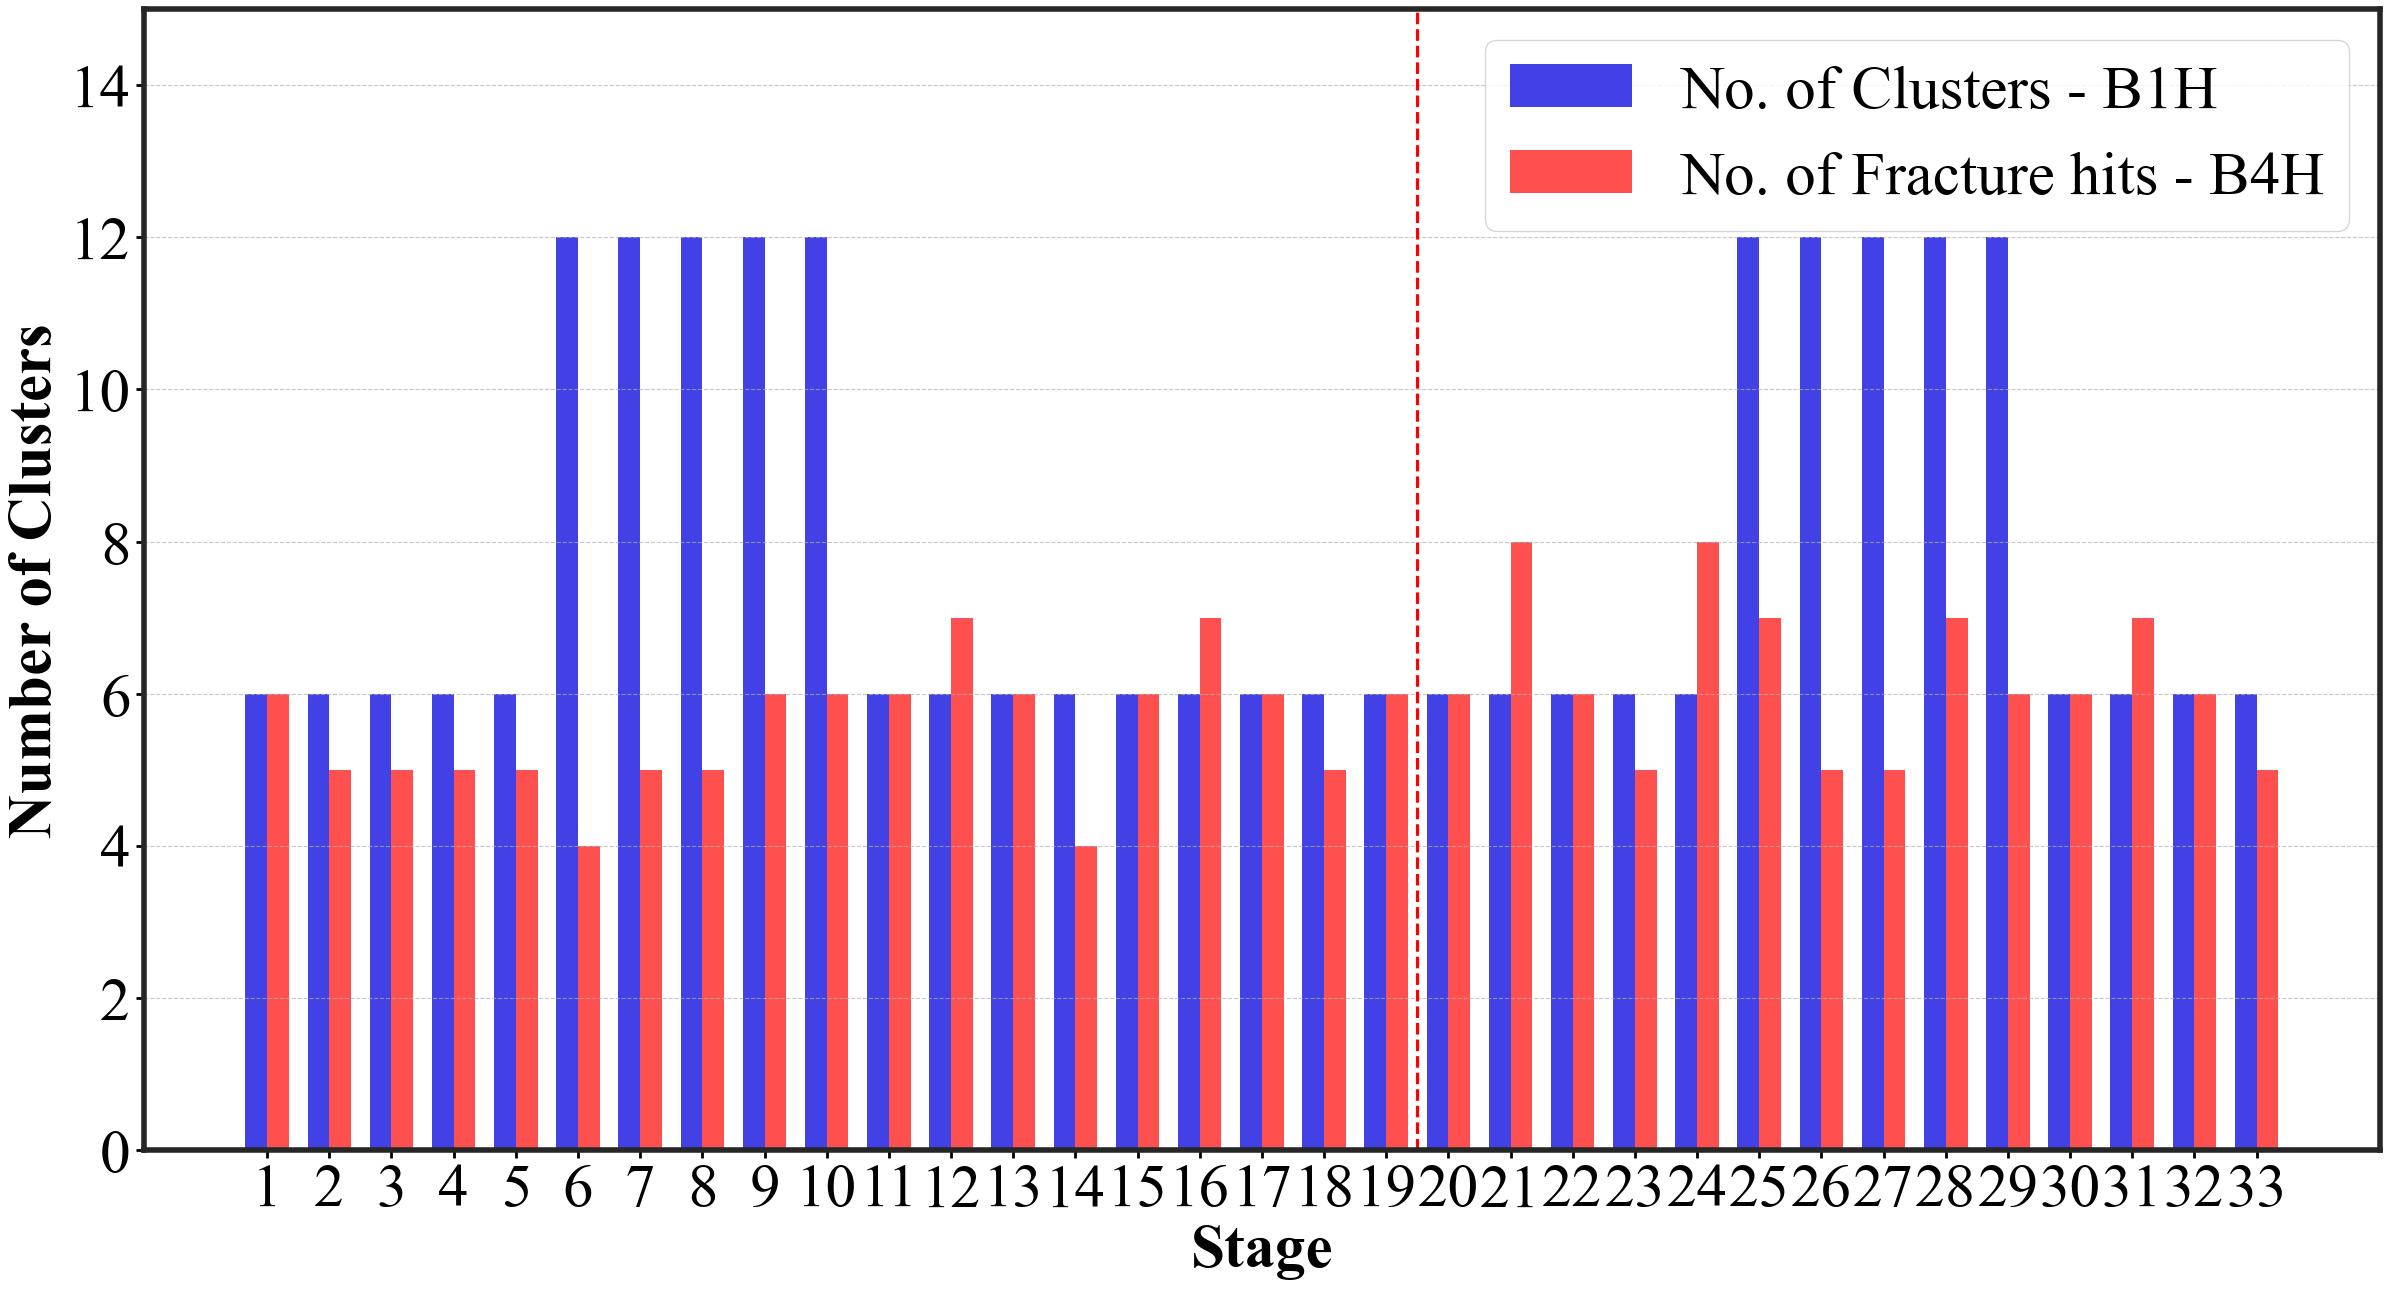

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
stages = np.arange(1, 34)
# Blue bars: No. of Clusters - B2H (Stage 1-30)
# Blue bars: No. of Clusters - B1H (Stages 1-33)
num_clusters = [
    6, 6, 6, 6, 6,              # Stages 1-5
    12, 12, 12, 12, 12,     # Stages 6-11
    6, 6, 6, 6, 6,
    6, 6, 6, 6, 6,
    6, 6, 6, 6,             # Stages 12-24
    12, 12, 12, 12, 12,         # Stages 25-29
    6, 6, 6, 6                  # Stages 30-33
]

# Orange bars: No. of Fracture hits - B4H (Stages 1-33)
num_fracture_hits = [
    6, 5, 5, 5, 5,              # Stages 1-5
    4, 5, 5, 6, 6,           # Stages 6-11 (Stage 10 appears to be 0)
    6, 7, 6, 4, 6, 
    7, 6, 5, 6, 6, 8, 6, 5, 8,           # Stages 19-24
    7, 5, 5, 7, 6,              # Stages 25-29
    6, 7, 6, 5                  # Stages 30-33
]

# 设置图形大小
plt.figure(figsize=(24,13))

# 设置柱宽和位置
bar_width = 0.35
x = np.arange(len(stages))

# 绘制柱状图
plt.bar(x - bar_width/2, num_clusters, width=bar_width, label='No. of Clusters - B1H', color="#4141E5")
plt.bar(x + bar_width/2, num_fracture_hits, width=bar_width, label='No. of Fracture hits - B4H', color='#FF5050')

# 添加分区线
plt.axvline(x=18.5, color='red', linestyle='--')  # Parent well impacted / not impacted

# 添加文本标签
# plt.text(7, 15, 'Parent well impacted', ha='center', va='center', fontsize=12)
# plt.text(23, 15, 'Parent well not impacted', ha='center', va='center', fontsize=12)

# 设置刻度和标签
plt.xticks(x, stages)
plt.xlabel('Stage')
plt.ylabel('Number of Clusters')
# plt.title('Frac hits at B3H during B2H treatment')
plt.legend(ncol=1)
plt.ylim(0,15)

# 显示网格线
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
